In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/cic-ids/cleaned_data1.csv')

# 1. What are the characteristics of the data? 

Explore the structure of the data:

In [ ]:
print(df.shape)

(3145725, 79)


In [ ]:
print(df.dtypes)

Dst Port            int64
Flow Duration       int64
Tot Fwd Pkts        int64
Tot Bwd Pkts        int64
TotLen Fwd Pkts     int64
                    ...  
Idle Max            int64
Idle Min            int64
Label              object
Protocol_17         int64
Protocol_6          int64
Length: 79, dtype: object


In [ ]:
print(df.head())

   Dst Port  Flow Duration  Tot Fwd Pkts  Tot Bwd Pkts  TotLen Fwd Pkts  \
0         0      112641719             3             0                0   
1         0      112641466             3             0                0   
2         0      112638623             3             0                0   
3        22        6453966            15            10             1239   
4        22        8804066            14            11             1143   

   TotLen Bwd Pkts  Fwd Pkt Len Max  Fwd Pkt Len Min  Fwd Pkt Len Mean  \
0                0                0                0          0.000000   
1                0                0                0          0.000000   
2                0                0                0          0.000000   
3             2273              744                0         82.600000   
4             2209              744                0         81.642857   

   Fwd Pkt Len Std  ...  Active Std  Active Max  Active Min   Idle Mean  \
0         0.000000  ...      

Calculate basic statistics

In [ ]:
print(df.min())
print(df.max())

Dst Port                       0
Flow Duration      -919011000000
Tot Fwd Pkts              -30971
Tot Bwd Pkts              -32170
TotLen Fwd Pkts                0
                       ...      
Idle Max                       0
Idle Min                       0
Label                     Benign
Protocol_17                    0
Protocol_6                     0
Length: 79, dtype: object
Dst Port                    65534
Flow Duration           120000000
Tot Fwd Pkts                21397
Tot Bwd Pkts                31262
TotLen Fwd Pkts           8737314
                        ...      
Idle Max             979781000000
Idle Min              12603000000
Label              SSH-Bruteforce
Protocol_17                     1
Protocol_6                      1
Length: 79, dtype: object


Data Exploration

 Number of flows per attack type

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

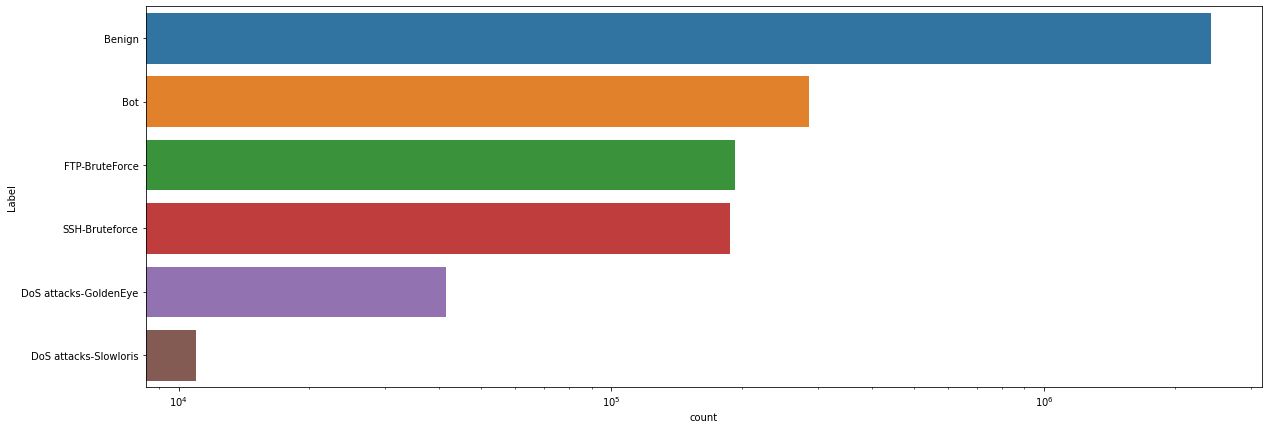

In [ ]:
f, ax = plt.subplots(figsize=(20, 7))
ax.set(xscale='log')
sns.countplot(y='Label', data=df, order = df['Label'].value_counts().index, ax=ax)

In [ ]:
df.groupby('Label').agg({'Label':'first', 'Label':'count'}).rename_axis(None).sort_values('Label', ascending=False)

,Label
Benign,2426087
Bot,286191
FTP-BruteForce,193360
SSH-Bruteforce,187589
DoS attacks-GoldenEye,41508
DoS attacks-Slowloris,10990


# What are the relationships between the different columns in the data?

In [ ]:
corr = df.drop(columns=['Label']).corr()

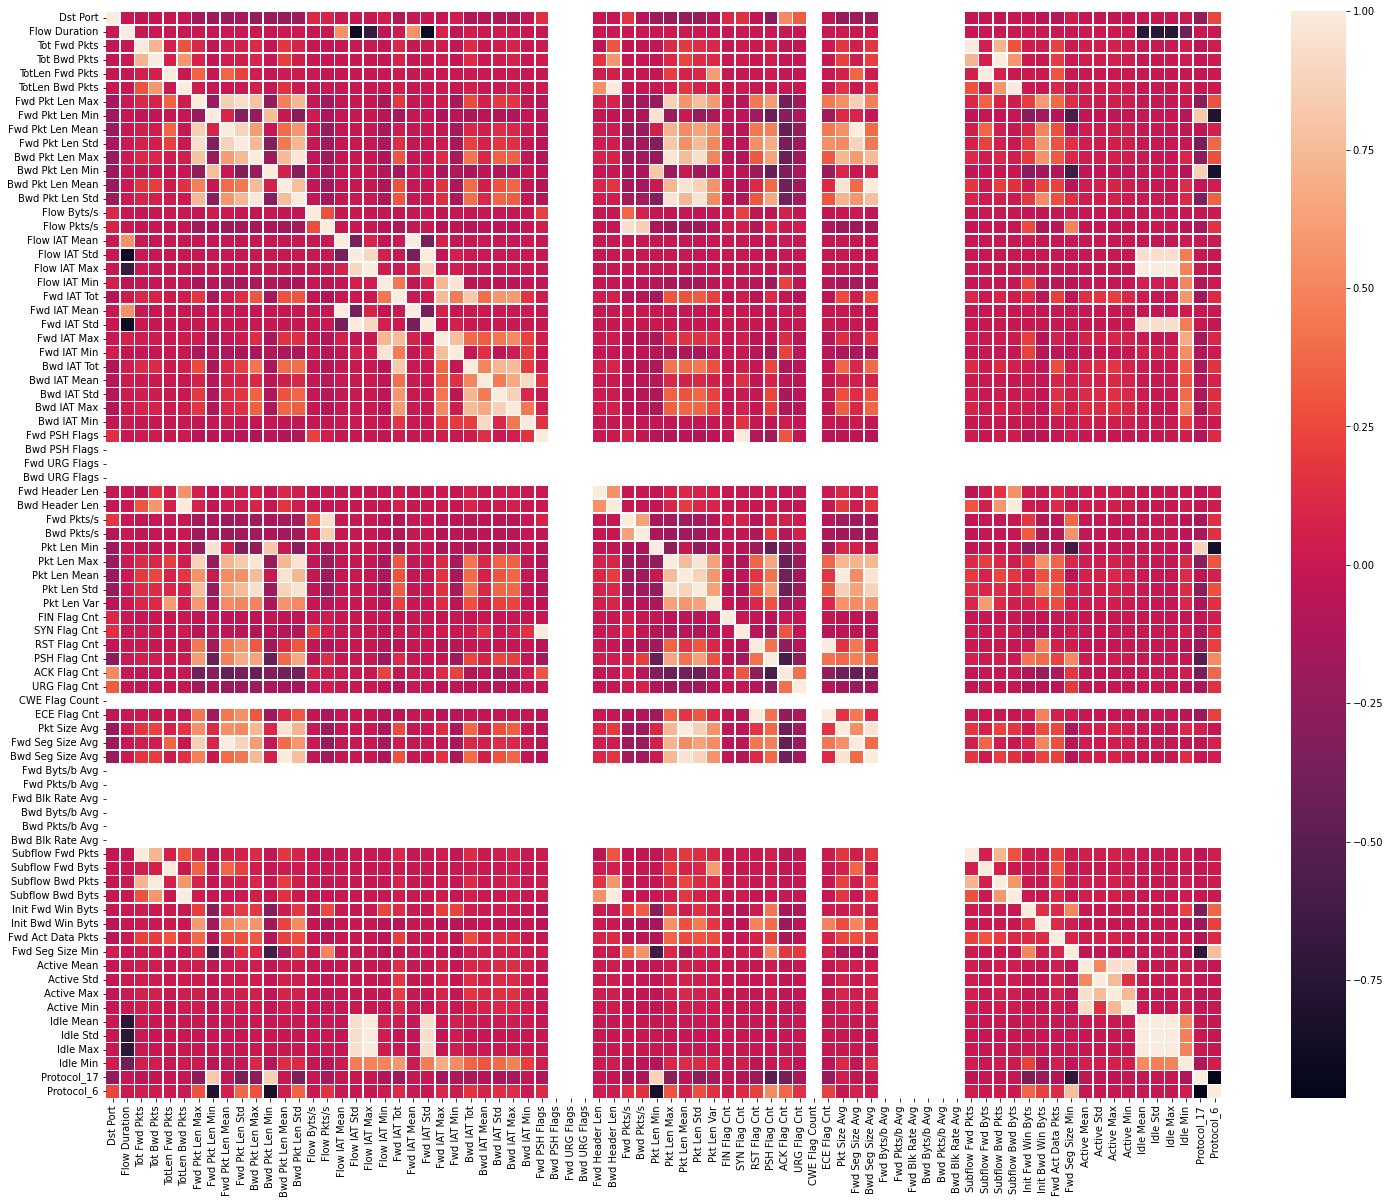

In [ ]:
plt.figure(figsize=(25, 20))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, linewidths = 0.5)
plt.savefig('/content/drive/MyDrive/corr.png')

In [ ]:
corr.cov()

,Dst Port,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Protocol_17,Protocol_6
Dst Port,0.035120,-0.001753,-0.004720,-0.004426,-0.005144,-0.002021,-0.031744,-0.014935,-0.033707,-0.029335,...,-0.002231,-0.002658,-0.003503,-0.001596,0.002188,0.002253,0.002247,-0.000313,-0.015609,0.014893
Flow Duration,-0.001753,0.079510,0.004025,0.005036,0.003403,0.004237,0.009244,-0.002183,0.007884,0.008681,...,0.003266,0.002678,0.003805,0.002646,-0.078634,-0.078553,-0.078429,-0.038620,-0.003427,0.003988
Tot Fwd Pkts,-0.004720,0.004025,0.044310,0.044130,0.002360,0.026853,0.008463,-0.003880,0.004344,0.006774,...,0.000724,0.001019,0.001763,0.000562,-0.007472,-0.007440,-0.007468,-0.004374,-0.002794,0.002918
Tot Bwd Pkts,-0.004426,0.005036,0.044130,0.052880,0.001629,0.042553,0.004490,-0.001483,0.000859,0.002468,...,-0.000480,0.000070,0.000563,-0.000415,-0.009285,-0.009188,-0.009238,-0.006537,0.000207,0.000033
TotLen Fwd Pkts,-0.005144,0.003403,0.002360,0.001629,0.038427,-0.002287,0.028526,-0.001734,0.028842,0.024266,...,-0.003073,-0.002059,-0.002781,-0.002549,-0.006607,-0.006393,-0.006475,-0.007357,-0.002385,0.003016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Idle Std,0.002253,-0.078553,-0.007440,-0.009188,-0.006393,-0.007956,-0.015167,0.002692,-0.013397,-0.014133,...,-0.005413,-0.004238,-0.006154,-0.004455,0.090267,0.090259,0.090148,0.043379,0.005023,-0.005861
Idle Max,0.002247,-0.078429,-0.007468,-0.009238,-0.006475,-0.008020,-0.015227,0.002510,-0.013549,-0.014194,...,-0.005400,-0.004210,-0.006125,-0.004450,0.090186,0.090148,0.090048,0.043898,0.004837,-0.005737
Idle Min,-0.000313,-0.038620,-0.004374,-0.006537,-0.007357,-0.006966,-0.008152,-0.009563,-0.012898,-0.007808,...,0.000269,0.001246,0.001005,-0.000150,0.045196,0.043379,0.043898,0.055158,-0.008836,0.004889
Protocol_17,-0.015609,-0.003427,-0.002794,0.000207,-0.002385,0.002684,-0.038904,0.080007,-0.013863,-0.046216,...,-0.000782,-0.000967,-0.001793,-0.000690,0.004429,0.005023,0.004837,-0.008836,0.086935,-0.086370


 4. Features having a correlation with the binary class of network flows

In [ ]:
def get_abs_correlations(df, t):
    labels_to_drop = set()
    cols = df.columns.drop(['Label'])
    for i in range(0, df.shape[1]-2):
        for j in range(0, i+1):
            labels_to_drop.add((cols[i], cols[j]))
    
    c = corr.abs().unstack().drop(labels=labels_to_drop).sort_values(ascending=False)
    return c[c > t]

with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(get_abs_correlations(df, 0.8))

Fwd Pkt Len Mean  Fwd Seg Size Avg    1.000000
Protocol_6        Protocol_6          1.000000
Tot Bwd Pkts      Subflow Bwd Pkts    1.000000
Tot Fwd Pkts      Subflow Fwd Pkts    1.000000
TotLen Fwd Pkts   Subflow Fwd Byts    1.000000
Fwd PSH Flags     SYN Flag Cnt        1.000000
Bwd Pkt Len Mean  Bwd Seg Size Avg    1.000000
TotLen Bwd Pkts   Subflow Bwd Byts    0.999999
RST Flag Cnt      ECE Flag Cnt        0.999994
Flow IAT Std      Fwd IAT Std         0.999975
Flow IAT Mean     Fwd IAT Mean        0.999897
Idle Std          Idle Max            0.999796
Idle Mean         Idle Max            0.999024
                  Idle Std            0.998746
Bwd Header Len    Subflow Bwd Byts    0.996193
TotLen Bwd Pkts   Bwd Header Len      0.996192
Flow IAT Max      Idle Max            0.994730
                  Idle Std            0.994534
                  Idle Mean           0.993745
Pkt Len Mean      Pkt Size Avg        0.993631
Bwd Pkt Len Max   Pkt Len Max         0.974469
             

Feature Selection

In [ ]:
df.replace(to_replace=["Bot", "FTP-BruteForce", "SSH-Bruteforce","DoS attacks-GoldenEye","DoS attacks-Slowloris"], value="Malicious", inplace=True)
df.replace(to_replace="Benign", value=0, inplace=True)
df.replace(to_replace="Malicious", value=1, inplace=True)


# What trends or patterns have been identified

In [ ]:
mean = df.groupby('Flow Duration')['Label'].mean()
std = df.groupby('Flow Duration')['Label'].std()

In [ ]:
counts = df.groupby('Flow Duration')['Label'].value_counts()
proportions = counts / counts.groupby(level=0).sum()

In [ ]:
# Print the summary statistics
print(mean, std)
print(counts, proportions)

Flow Duration
-919011000000    0.0
-681402000000    0.0
-529801000000    0.0
-273850000000    0.0
-11873000000     0.0
                ... 
 119999974       0.0
 119999989       0.0
 119999997       0.0
 119999999       0.0
 120000000       0.0
Name: Label, Length: 1181972, dtype: float64 Flow Duration
-919011000000    NaN
-681402000000    NaN
-529801000000    NaN
-273850000000    NaN
-11873000000     NaN
                ... 
 119999974       NaN
 119999989       0.0
 119999997       NaN
 119999999       0.0
 120000000       NaN
Name: Label, Length: 1181972, dtype: float64
Flow Duration  Label
-919011000000  0        1
-681402000000  0        1
-529801000000  0        1
-273850000000  0        1
-11873000000   0        1
                       ..
 119999974     0        1
 119999989     0        2
 119999997     0        1
 119999999     0        2
 120000000     0        1
Name: Label, Length: 1208509, dtype: int64 Flow Duration  Label
-919011000000  0        1.0
-681402000000  0     

In [ ]:
from scipy import stats

Minimum segment size observed in the forward direction

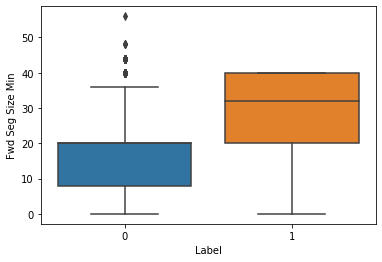

In [ ]:
sns.boxplot(x=df['Label'], y=df['Fwd Seg Size Min'])

Number of backward packets per second

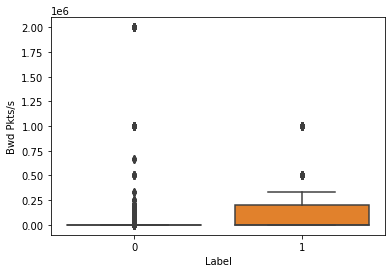

In [ ]:
sns.boxplot(x=df['Label'], y=df['Bwd Pkts/s'])

Number of packets with ACK flag

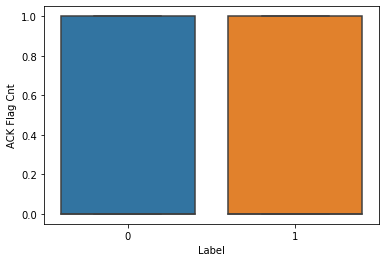

In [ ]:
sns.boxplot(x=df['Label'], y=df['ACK Flag Cnt'])

Minimum size of packet in backward direction

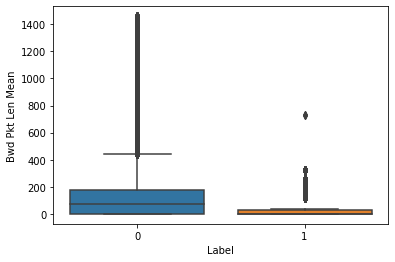

In [ ]:
sns.boxplot(x=df['Label'], y=df['Bwd Pkt Len Mean'])